In [1]:
import numpy as np
import qiskit.quantum_info
from qiskit.execute_function import execute
from qiskit import *
import qiskit
from qiskit.visualization import plot_histogram
backend = BasicAer.get_backend('statevector_simulator')


from SYMQCircuit import *

# Testing 1 qubit gates:

In [2]:
nr = 1
size = 2


test = QuantumCircuit(size)
test.x(nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_x(nr)
a = test2.get_circuit_unitary()

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

In [3]:
test = QuantumCircuit(size)
test.y(nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_y(nr)
a = test2.get_circuit_unitary()

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

In [4]:
test = QuantumCircuit(size)
test.z(nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_z(nr)
a = test2.get_circuit_unitary()

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

In [5]:
test = QuantumCircuit(size)
test.h(nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_h(nr)
a = test2.get_circuit_unitary()

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

In [6]:
test = QuantumCircuit(size)
test.rx(1/3,nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_rx(nr,1/3)
a = test2.get_circuit_unitary()

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

In [7]:
test = QuantumCircuit(size)
test.ry(1/3,nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_ry(nr,1/3)
a = test2.get_circuit_unitary()

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

In [8]:
test = QuantumCircuit(size)
test.rz(1/3,nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_rz(nr,1/3)
a = test2.get_circuit_unitary()

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

In [9]:
test = QuantumCircuit(size)
test.rz(1/3,nr)
test.ry(2/3,nr)
test.ry(4/3,nr)
test.x(nr)
test.h(nr)
test.rx(2/7,nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_rz(nr,1/3)
test2.add_ry(nr,2/3)
test2.add_ry(nr,4/3)
test2.add_x(nr)
test2.add_h(nr)
test2.add_rx(nr,2/7)
a = test2.get_circuit_unitary()

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

# Testing 2 qubit gates:


--------------
#### CNOT:
--------------

In [10]:
nr = 1
size = 3

test = QuantumCircuit(size)
test.cnot(control_qubit=1,target_qubit=2)
qiskit_cnot = qiskit.quantum_info.Operator(test).data.real.astype(int)

test2 = SYMQCircuit(size)
test2.add_cnot(control_qubit=1,target_qubit=2)
my_cnot = test2.get_circuit_unitary().real.astype(int)

if not np.allclose(my_cnot,qiskit_cnot):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

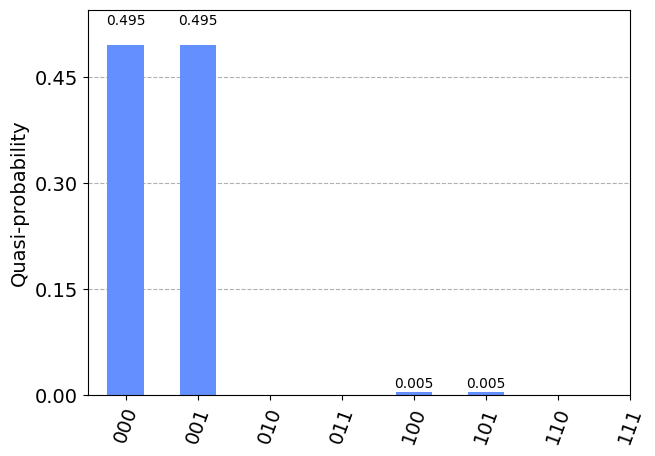

In [11]:
size = 3

test = QuantumCircuit(size)
test.h(0)
test.rx(theta=4/21,qubit=2)
test.cnot(control_qubit=1,target_qubit=2)

test2 = SYMQCircuit(size)
test2.add_h(0)
test2.add_rx(angle=4/21,target_qubit=2)
test2.add_cnot(control_qubit=1,target_qubit=2)

probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

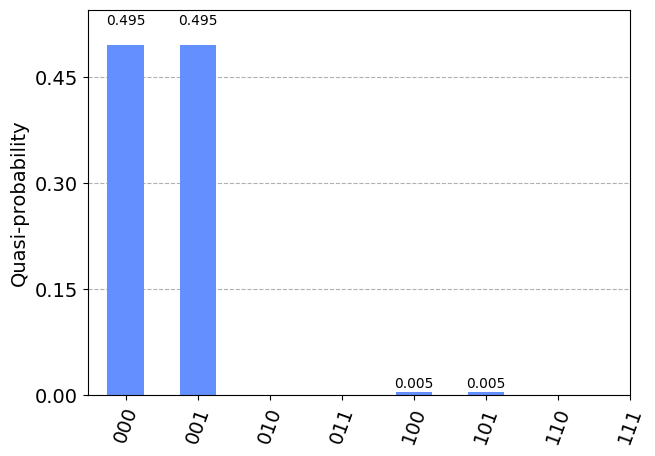

In [12]:
job = execute(test, backend)
statevec = job.result().get_statevector()
probs = get_state_probabilities(state_vector_=statevec)
reversed_states = {}
plot_histogram(probs)

---------------
#### SWAP:
--------------

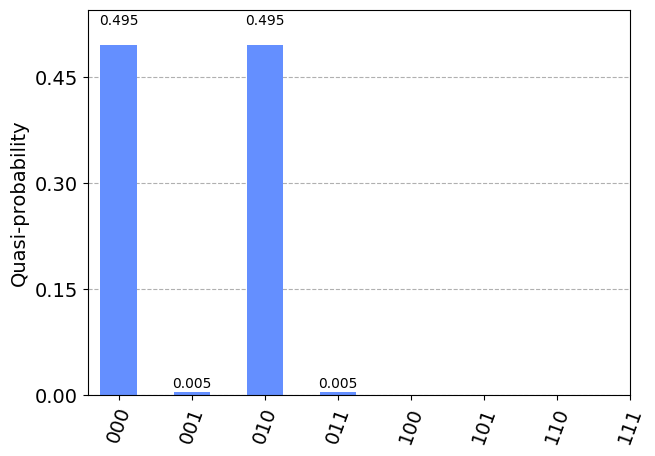

In [13]:
size = 3
test = QuantumCircuit(size)
test.h(0)
test.rx(theta=4/21,qubit=1)
test.swap(qubit1=0,qubit2=1)

test2 = SYMQCircuit(size)
test2.add_h(0)
test2.add_rx(angle=4/21,target_qubit=1)
test2.add_swap(qubit_1=0,qubit_2=1)


if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

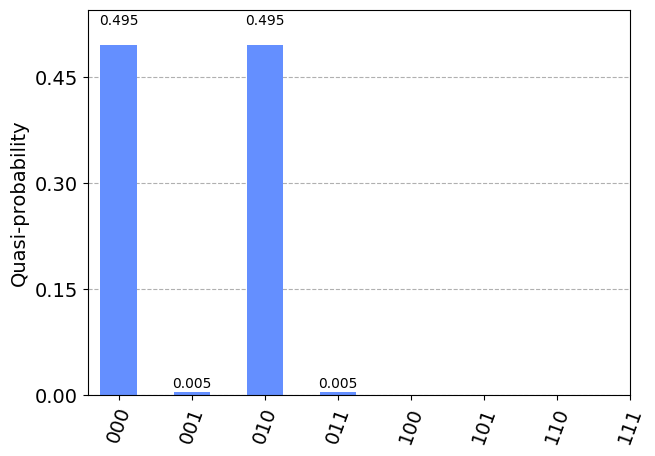

In [14]:
job = execute(test, backend)
statevec = job.result().get_statevector()
probs = get_state_probabilities(state_vector_=statevec)
plot_histogram(probs)

--------------
#### RZZ:
--------------

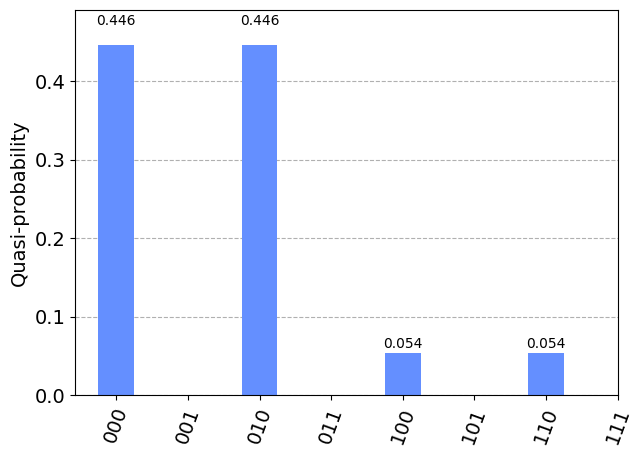

In [15]:
size = 3
nr = 2
test = QuantumCircuit(size)
test.h(1)
test.rz(1/3,nr)
test.ry(2/3,nr)
test.rzz(qubit1=1,qubit2=2, theta=np.pi/3)


test2 = SYMQCircuit(size)
test2.add_h(1)
test2.add_rz(nr,1/3)
test2.add_ry(nr,2/3)
test2.add_rzz(qubit_1=1,qubit_2=2, angle=np.pi/3)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

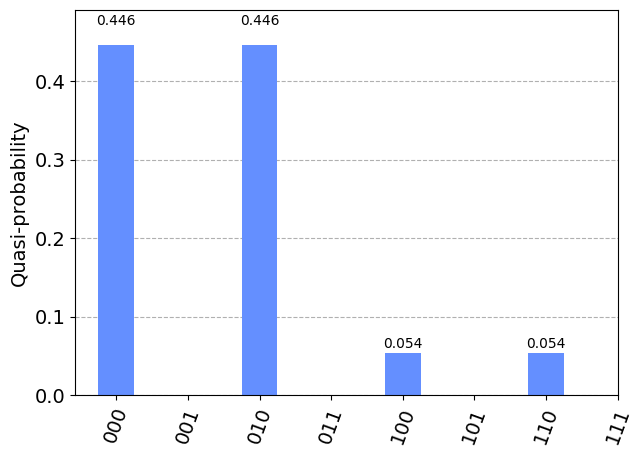

In [16]:
job = execute(test, backend)
statevec = job.result().get_statevector()
probs = get_state_probabilities(state_vector_=statevec)
plot_histogram(probs)

--------------
#### RXX:
--------------

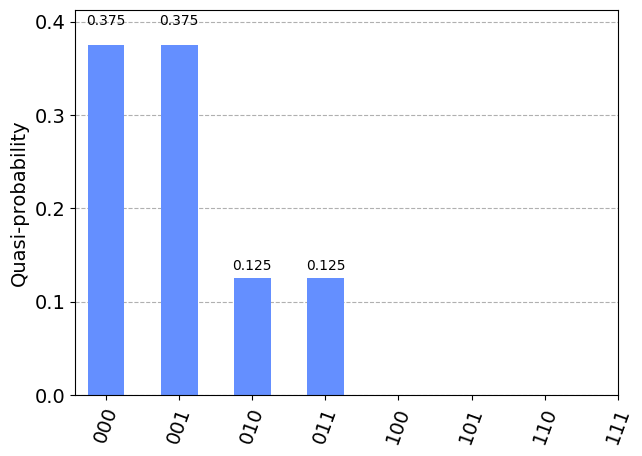

In [17]:
size = 3
test = QuantumCircuit(size)
test.rz(1/3,1)
test.h(0)
test.rxx(theta=np.pi/3,qubit1=0,qubit2=1)


test2 = SYMQCircuit(size)
test2.add_rz(1,1/3)
test2.add_h(0)
test2.add_rxx(qubit_1=0,qubit_2=1, angle=np.pi/3)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

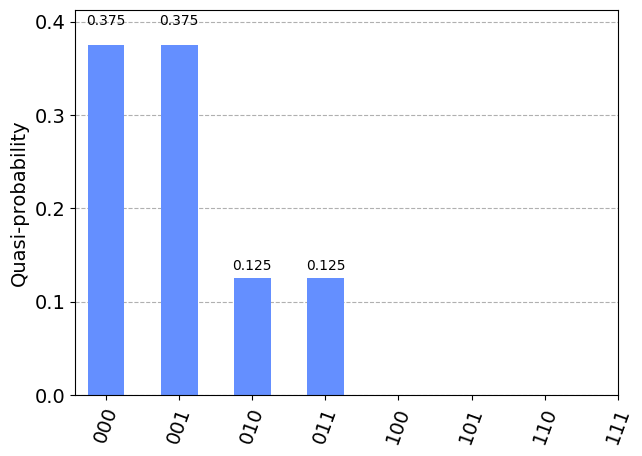

In [18]:
job = execute(test, backend)
statevec = job.result().get_statevector()
probs = get_state_probabilities(state_vector_=statevec)
plot_histogram(probs)

--------------
#### RYY:
--------------

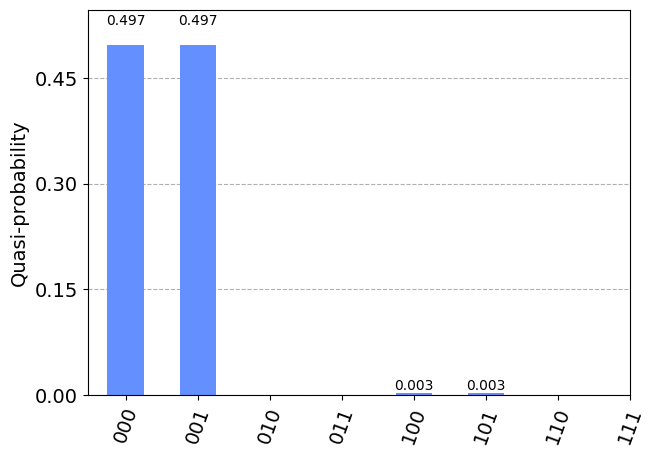

In [19]:
size = 3
test = QuantumCircuit(size)
test.rz(1/3,1)
test.h(0)
test.ryy(theta=np.pi/21,qubit1=0,qubit2=2)


test2 = SYMQCircuit(size)
test2.add_rz(1,1/3)
test2.add_h(0)
test2.add_ryy(qubit_1=0,qubit_2=2, angle=np.pi/21)


if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

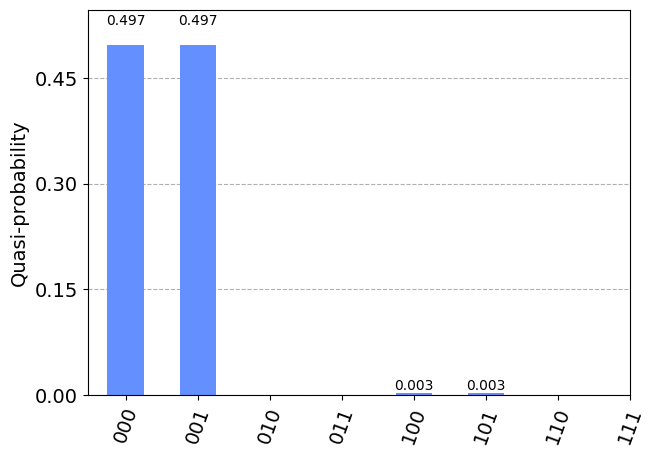

In [20]:
job = execute(test, backend)
statevec = job.result().get_statevector()
probs = get_state_probabilities(state_vector_=statevec)
plot_histogram(probs)

--------------
#### CY:
--------------

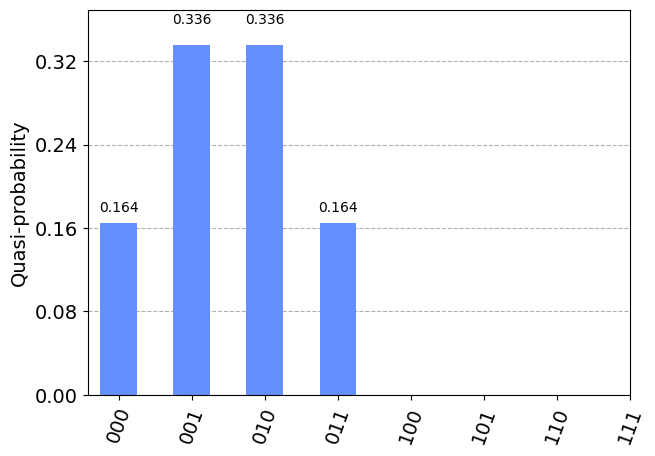

In [21]:
size = 3
test = QuantumCircuit(size)
test.rz(1/3,1)
test.h(0)
test.h(1)
test.ry(qubit=1,theta=np.pi/9)
test.cy(control_qubit=0,target_qubit=1)


test2 = SYMQCircuit(size)
test2.add_rz(1,1/3)
test2.add_h(0)
test2.add_h(1)
test2.add_ry(target_qubit=1,angle=np.pi/9)
test2.add_cy(control_qubit=0,target_qubit=1)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

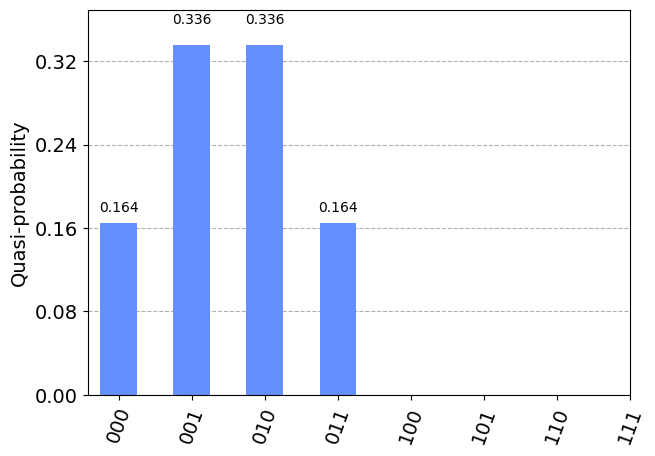

In [22]:
job = execute(test, backend)
statevec = job.result().get_statevector()
probs = get_state_probabilities(state_vector_=statevec)
plot_histogram(probs)

--------------
#### CZ:
--------------

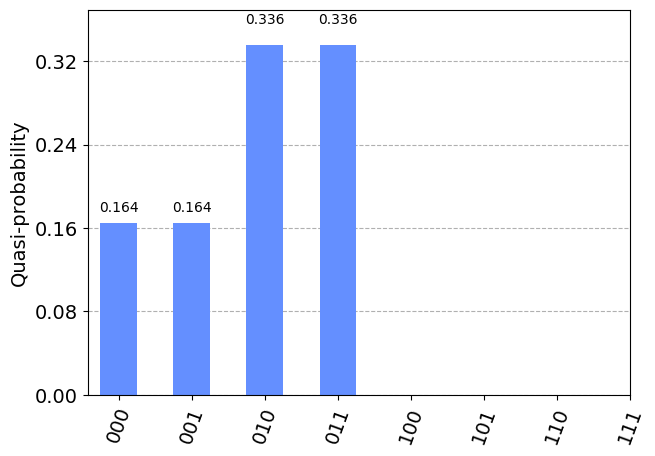

In [23]:
size = 3
test = QuantumCircuit(size)
test.rz(1/3,1)
test.h(0)
test.h(1)
test.ry(qubit=1,theta=np.pi/9)
test.cz(control_qubit=0,target_qubit=1)


test2 = SYMQCircuit(size)
test2.add_rz(1,1/3)
test2.add_h(0)
test2.add_h(1)
test2.add_ry(target_qubit=1,angle=np.pi/9)
test2.add_cz(control_qubit=0,target_qubit=1)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

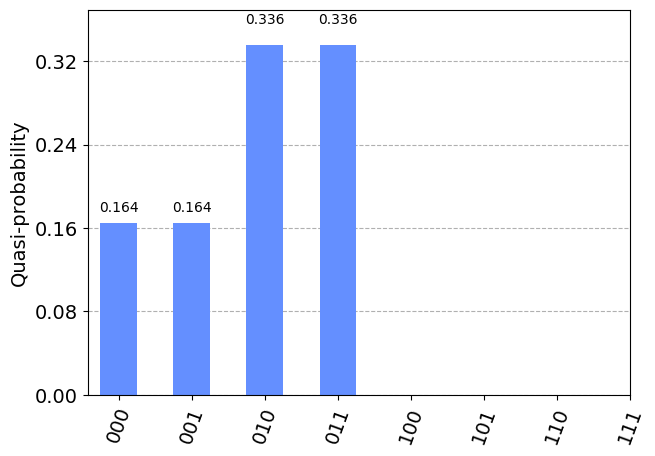

In [24]:
job = execute(test, backend)
statevec = job.result().get_statevector()
probs = get_state_probabilities(state_vector_=statevec)
plot_histogram(probs)